In [80]:
# importing basic EDA libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# setting figure parameters and style
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style='darkgrid', palette='viridis')

# labelencoder is used for encoding categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# importing logistic regression model
from sklearn.linear_model import LogisticRegression

#importing  test train split 
from sklearn.model_selection import train_test_split

# for scaling the data
from sklearn.preprocessing import StandardScaler

# metics to check the performance of the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score

In [10]:
# importing dataset
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.shape

(9431, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9431 entries, 0 to 9430
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9431 non-null   int64 
 1   job        9431 non-null   object
 2   marital    9431 non-null   object
 3   education  9431 non-null   object
 4   default    9431 non-null   object
 5   balance    9431 non-null   int64 
 6   housing    9431 non-null   object
 7   loan       9431 non-null   object
 8   contact    9431 non-null   object
 9   day        9431 non-null   int64 
 10  month      9431 non-null   object
 11  duration   9431 non-null   int64 
 12  campaign   9431 non-null   int64 
 13  pdays      9431 non-null   int64 
 14  previous   9431 non-null   int64 
 15  poutcome   9431 non-null   object
 16  y          9431 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [12]:
# statistics for numeric data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,9431.0,9431.0
mean,39.431662,1062.388400,15.515322,263.385007,2.619340,-1.0,0.0
std,9.286370,2549.931513,9.100660,250.087132,2.996701,0.0,0.0
min,20.000000,-3372.000000,2.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,41.500000,7.000000,115.000000,1.000000,-1.0,0.0
50%,38.000000,340.000000,15.000000,191.000000,2.000000,-1.0,0.0
75%,46.000000,1088.500000,23.000000,322.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,30.000000,3366.000000,63.000000,-1.0,0.0


In [13]:
# getting stats for object data
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,9431,9431,9431,9431,9431,9431,9431,9431,9431,9431
unique,12,3,4,2,2,2,1,2,1,2
top,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
freq,3090,5710,5418,9220,8257,8012,9431,7957,9431,9105


In [21]:
# checking for null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
# checking for duplicate values
df.duplicated().sum()

0

In [15]:
# getting values unique entries of target label
df['y'].value_counts()

no     9105
yes     326
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

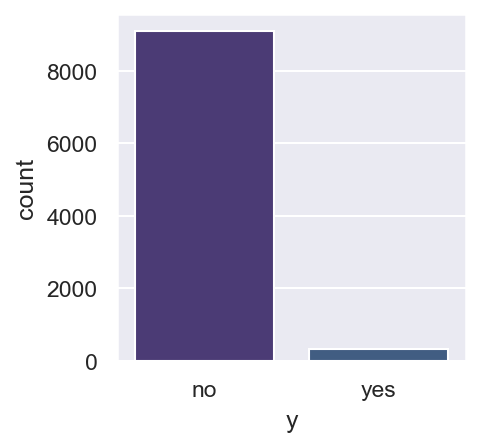

In [19]:
# visualization of target variable
sns.countplot(data = df, x = 'y')

### Target data is highly imbalanced

In [25]:
#visualizing only object type data
df[df.select_dtypes(include=['object']).any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9426,37,management,married,tertiary,no,657,no,no,unknown,6,jun,227,1,-1,0,unknown,no
9427,39,services,married,secondary,no,-540,no,no,unknown,6,jun,29,1,-1,0,unknown,no
9428,34,technician,married,secondary,no,139,yes,yes,unknown,6,jun,52,13,-1,0,unknown,no
9429,53,blue-collar,married,secondary,no,66,no,no,unknown,6,jun,360,2,-1,0,unknown,no


In [36]:
# creating a dataset that contains all the object datatype row from main dataframe
df_categorical = df.select_dtypes('object')
df_categorical.head()

In [38]:
# creating a dataset that contains all the integer datatype row from main dataframe
df_num = df.select_dtypes('int64')
df_num.head()

In [41]:
# encoding categorical (object) columns using label encoding
for column in df_categorical:
    df_categorical[column] = encoder.fit_transform(df_categorical[column])

In [42]:
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,0,1,0,0
1,9,2,1,0,1,0,0,1,0,0
2,2,1,1,0,1,1,0,1,0,0
3,1,1,3,0,1,0,0,1,0,0
4,11,2,3,0,0,0,0,1,0,0


In [43]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9431 entries, 0 to 9430
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   job        9431 non-null   int32
 1   marital    9431 non-null   int32
 2   education  9431 non-null   int32
 3   default    9431 non-null   int32
 4   housing    9431 non-null   int32
 5   loan       9431 non-null   int32
 6   contact    9431 non-null   int32
 7   month      9431 non-null   int32
 8   poutcome   9431 non-null   int32
 9   y          9431 non-null   int32
dtypes: int32(10)
memory usage: 368.5 KB


In [82]:
# concatination of integer columns and encoded ccategorical columns
df = pd.concat([df_num,df_categorical],axis = 1)

In [53]:
df.head(2)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,0,1,0,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,0,1,0,0


In [55]:
# splitting the data into feature and target variable
x = df.drop('y', axis = 1)
y = df['y']

In [56]:
# train test split of data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [57]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
736,40,-7,6,410,2,-1,0,1,1,0,0,1,0,0,1,0
9088,56,206,5,315,1,-1,0,1,1,0,0,0,0,0,0,0
3820,39,95,16,230,1,-1,0,1,1,0,0,1,0,0,1,0
2235,24,1535,12,126,2,-1,0,8,2,2,0,1,0,0,1,0
1860,37,447,9,1170,1,-1,0,9,1,2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,31,0,6,36,5,-1,0,6,1,1,0,1,0,0,1,0
5695,50,1651,26,41,2,-1,0,0,2,1,0,1,0,0,1,0
8006,33,-244,2,63,2,-1,0,9,2,1,0,1,0,0,0,0
1361,41,205,8,91,1,-1,0,7,1,1,0,1,0,0,1,0


In [58]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9426    0
9427    0
9428    0
9429    0
9430    0
Name: y, Length: 9431, dtype: int32

In [83]:
# scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [66]:
# creating a model instance
model  = LogisticRegression()

In [67]:
# training the model
model.fit(x_train,y_train)

LogisticRegression()

In [68]:
#checking model coefficients
model.coef_

array([[ 0.02664694, -0.05407701,  0.39427224,  1.2875652 , -0.02954341,
         0.        ,  0.        ,  0.0711957 , -0.04272703, -0.05905547,
         0.07285098,  0.17084129, -0.15383944,  0.        , -0.47457434,
         0.        ]])

In [84]:
# making predictions based on x_test
y_pred = model.predict(x_test)

In [70]:
# accuracy of model
accuracy_score(y_test,y_pred)

0.9676735559088501

In [71]:
confusion_matrix(y_test,y_pred)

array([[1804,   13],
       [  48,   22]], dtype=int64)

<Axes: >

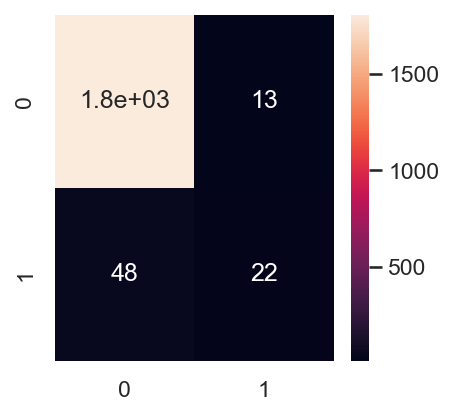

In [72]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1817
           1       0.63      0.31      0.42        70

    accuracy                           0.97      1887
   macro avg       0.80      0.65      0.70      1887
weighted avg       0.96      0.97      0.96      1887



#### Interpretation 
- **As the data is imbalanced we can't directly rely on just accuracy, therefore we check for Recall and precsision**
- **Recall and precision for 0 is very good as the count of 0's is much more than 1's, hence model can predict for 0 values with accuratly**
- **Recall and precision for 1's is poor due to imbalance in count of 1's and 0's**

In [85]:
# generating probability estimates
proba = model.predict_proba(x_test)[:,1]
proba

array([0.00988038, 0.00585953, 0.41971384, ..., 0.03500112, 0.00539749,
       0.00605524])

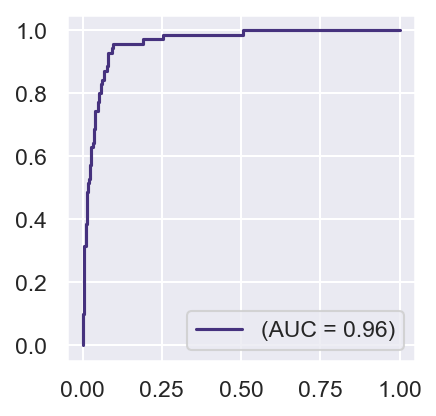

In [88]:
# creating ROC curve
auc = roc_auc_score(y_test,proba)
fpr,tpr, threshold = roc_curve(y_test,proba)
plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [79]:
auc

0.9610818460570799

#### overall model is performing good in predicitng 0's, due to imbalance in dataset model performance for 1's is moderate.
- note* to eleminate imbalance we can perfrom sampling  